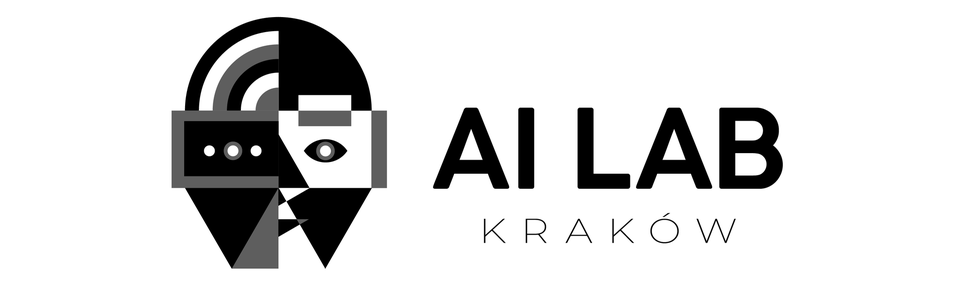

# AI Lab Recruitment Tasks
Dear Candidate,

We are pleased to inform you that you are about to begin the recruitment test for membership at AI Lab. Please ensure that you have a quiet space and all necessary materials before starting.

The test will assess your skills and suitability for the position, and it is expected to take approximately one week to complete. We encourage you to read the instructions carefully before proceeding.

To submit your solutions, you must fork the [AI_Lab_Recruitment_Tasks_2024](https://github.com/AI-LAB-AGH/AI_Lab_Recruitment_Tasks_2024) repository. Remember to make it private and add AI Lab members as collaborators: <a href="https://github.com/bjam24">bjam24</a> and <a href="https://github.com/BartekKruczek">BartekKruczek</a>.

Further information about this test may be available in the repository's README file.

If you encounter any issues during the test or have any additional questions, feel free to contact us at ailab@agh.edu.pl.

By participating in this recruitment, you agree to uphold the integrity of the process. In case of any dishonesty or attempts to cheat (e.g using ChatGPT, copying work), your candidacy will be **disqualified**, and your application will no longer be processed.

We wish you the best of luck and thank you for your interest in joining our team!

Best regards,

AI Lab Recruitment Team

## Task 1 - Classification

Using the  [Real / Fake Job Posting Prediction](https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction)  dataset, create a machine learning model that classifies job postings as either real or fake. Your model should utilize both the text of the job descriptions and additional metadata features to achieve accurate predictions. You are encouraged to take any necessary steps in this task to obtain the best possible results. The more thorough and effective your approach, the more your effort will be appreciated.

In [1]:
# Najbardziej wydajny algorytm to:

def isJobOfferFraudulent(jobOffer):
    return False

# ponieważ 95% ofert w tej bazie danych jest prawdziwa :)

# Ale jak jesteście zainteresowani modelem ML to jest poniżej.

# Wybieram x najczęściej występujących słów w description w ofertach (poza tymi co występują bardzo często)
# i na podstawie tego czy są w ofercie czy nie model decyduje czy oferta jest nie prawdziwa.
# Model potrafi osiągnąć około 98% skuteczności!

In [2]:
import requests
import os
from zipfile import ZipFile

if not os.path.exists('fake_job_postings.csv'):
      r = requests.get('https://www.kaggle.com/api/v1/datasets/download/shivamb/real-or-fake-fake-jobposting-prediction', allow_redirects=True)
      open('data.zip', 'wb').write(r.content)
      with ZipFile('data.zip', 'r') as zipObj:
          zipObj.extractall()

In [3]:
import pandas as pd
import numpy as np
import re

df = pd.read_csv('fake_job_postings.csv')
print(df['fraudulent'].value_counts())
s = str.join(' ', df['description'].astype(str))

words = pd.Series(re.sub(r'[^a-zA-Z\s]', '', s).split(' ')).astype(str).replace('', np.nan).dropna().str.lower()
wordCount = words.groupby(words).count().sort_values(ascending=False)[500:1000]
wordCount.to_csv('wordCount.csv', header=False)
print(wordCount)
df

fraudulent
0    17014
1      866
Name: count, dtype: int64
vision        806
interested    803
closing       801
base          798
requests      797
             ... 
accordance    389
serving       389
winning       389
deadlines     389
drivers       388
Length: 500, dtype: int64


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [4]:
sample = df[['description', 'fraudulent']]
l = [[str(w) in str(des) for w in wordCount.index] for des in sample['description']]
newD = pd.DataFrame(l, columns=wordCount.index)
sample[sample['fraudulent'] == 1].count()

description    865
fraudulent     866
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(newD, sample['fraudulent'], test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(14304, 500)
(14304,)
(3576, 500)
(3576,)


In [6]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(500,)),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)]
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=32, callbacks=callbacks)

2024-11-22 01:44:29.970481: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-22 01:44:29.993842: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-22 01:44:30.000040: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-22 01:44:30.031534: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1732236272.306431  1208

Num GPUs Available:  1
Epoch 1/30


I0000 00:00:1732236273.186509  121070 service.cc:146] XLA service 0x78ac44006f30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732236273.186552  121070 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-11-22 01:44:33.215421: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-22 01:44:33.322172: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


 77/447 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9522 - loss: 0.2778

I0000 00:00:1732236273.981018  121070 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


447/447 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - binary_accuracy: 0.9532 - loss: 0.1983 - val_binary_accuracy: 0.9656 - val_loss: 0.1203
Epoch 2/30
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.9720 - loss: 0.0908 - val_binary_accuracy: 0.9732 - val_loss: 0.1076
Epoch 3/30
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.9831 - loss: 0.0582 - val_binary_accuracy: 0.9760 - val_loss: 0.1060
Epoch 4/30
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.9912 - loss: 0.0323 - val_binary_accuracy: 0.9760 - val_loss: 0.1116
Epoch 5/30
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.9954 - loss: 0.0176 - val_binary_accuracy: 0.9762 - val_loss: 0.1186
Epoch 6/30
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.9974 - loss: 0.0118 - val_binary_accuracy: 0.9773 - val_loss: 0.1316
Epoch 7/30
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.9970 - loss: 0.0111 - val_binary_accuracy: 0.9779 - val_loss: 0.1419
Epoch 8/30
447/44

In [7]:
df_numeric = df.select_dtypes(include=[np.number])
(x_train, x_test, y_train, y_test) = train_test_split(df_numeric.drop(columns=['fraudulent']), df_numeric['fraudulent'], test_size=0.2)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, min_delta=0.001, restore_best_weights=True)]
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=32, callbacks=callbacks)

Epoch 1/30
447/447 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - binary_accuracy: 0.9536 - loss: 0.6392 - val_binary_accuracy: 0.9494 - val_loss: 0.2458
Epoch 2/30
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.9528 - loss: 0.2054 - val_binary_accuracy: 0.9494 - val_loss: 0.2004
Epoch 3/30
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.9539 - loss: 0.1870 - val_binary_accuracy: 0.9494 - val_loss: 0.2004
Epoch 4/30
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.9496 - loss: 0.1999 - val_binary_accuracy: 0.9494 - val_loss: 0.2005
Epoch 5/30
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.9529 - loss: 0.1954 - val_binary_accuracy: 0.9494 - val_loss: 0.2004
Epoch 6/30
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.9519 - loss: 0.1929 - val_binary_accuracy: 0.9494 - val_loss: 0.2005
Epoch 7/30
447/447 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.9510 - loss: 0.1956 - val_binary_accuracy: 0.9494 - val_loss: 0.2004
Epoch 

## Task 2 - NLP

### Beginner

The dataset CENSUS-NER-Name-Email-Address-Phone is available at [Hugging Face](https://huggingface.co/datasets/Josephgflowers/CENSUS-NER-Name-Email-Address-Phone). Write a single regular expression that will find email addresses in various formats in the 'user' column, for example:
- user@domain.com
- user@domain.co.uk
- user123@domain.com
- user+tag@domain.com

Count the occurrences of domain names. Present the results in a bar chart. Solutions other than exclusively one regular expression will not be considered.

In [8]:
if not os.path.exists('emails.csv'):
      r = requests.get('https://huggingface.co/datasets/Josephgflowers/CENSUS-NER-Name-Email-Address-Phone/resolve/main/FMCSA_CENSUS1_2016Sep_formatted_output.csv?download=true', allow_redirects=True)
      open('emails.csv', 'wb').write(r.content)

In [9]:
df = pd.read_csv('emails.csv')['user']
df

0          POWELL DISTRIBUTING CO INC, nan, (503) 289-555...
1          NEW JERSEY BOOM & ERECTORS INC, GAIL@NJBOOM.CO...
2          NEAL RAY, MONTOYARAY@YMAIL.COM, (229) 535-4140...
3          GUERRERA LANDSCAPING LLC, nan, (203) 453-6693,...
4          REINHARD CORP, nan, (203) 272-2869, 1647 REINH...
                                 ...                        
1048570    HANSFORD INDUSTRIES INC, nan, (916) 379-0210, ...
1048571    JOSE L CEJA, nan, (818) 765-6494, 7408 CARTWRI...
1048572    JAVIER A GUZMAN, nan, (510) 235-6280, 326 S DE...
1048573    ANGEL R DIAZ, nan, (800) 672-2154, 15541 E GAL...
1048574    ERNESTO C SEGURA, nan, (619) 954-1810, 10140 M...
Name: user, Length: 1048575, dtype: object

In [10]:
df1 = df.apply(lambda x: re.search(r' [^, ]*?@[^, ]*?\.[^, ]*?\,', x)).dropna().apply(lambda x: x.group(0)[:-1]).str.strip()
df1.to_csv('emails_exctracted.csv', header=False, index=False)
df1

1                          GAIL@NJBOOM.COM
2                     MONTOYARAY@YMAIL.COM
5                       JACKJR59@GMAIL.COM
6          CENTRALHEATING@MIDCONETWORK.COM
7                       ACASEY@ADAMSVS.NET
                        ...               
1048024     EARTHMOVERSUNLIMITED@YAHOO.COM
1048186         DIANEBENCOTER@FRONTIER.COM
1048258                 FEIANGIE@YAHOO.COM
1048371                 MRST78@HOTMAIL.COM
1048520          BARRERASANDRA37@GMAIL.COM
Name: user, Length: 486020, dtype: object

### Intermediate

Please take one pre-trained NLP model form HuggingFace (size of it is up to you). Your task is to make a promp with question about our University. Nest, pass 3-5 pages of English version of AGH students regulation and ask these questions again. Point is to detect anomalies (within answers) and see how model itself behave with long term memory. No fine-tuning required.

In [11]:
# Niestety omijam to zadanie bo po zaciętej walce z pythonem 
# nie udało mi się odpalić ani jednego modelu :(
# za to zepsułem sobie condę i tensorflowa...

## Task 3 - Computer Vision

### Beginner
Take pre-trained model for imege classification (ex. MobileNetV2). Pick one image from the Internet (any you like), pre-proccess it, make it black and white instead of RGB, try to find out if the is some Gaussian noise (maybe get rid of it), pass to model and print top 5 classified classess of the image.

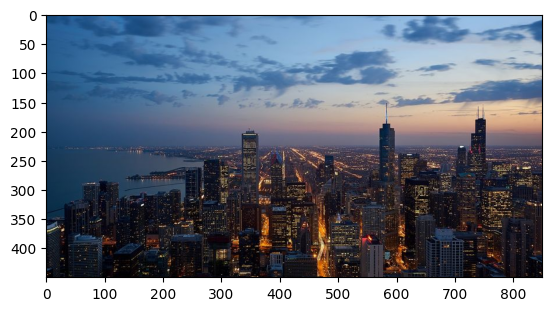

In [12]:
import cv2
import matplotlib.pyplot as plt

I = cv2.cvtColor(cv2.imread('img.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(I)
plt.show()

In [13]:
import tensorflow as tf
from keras.applications import MobileNetV2
from keras.applications.mobilenet_v2 import decode_predictions, preprocess_input


data = preprocess_input(I[-224:, -224:].reshape(1, 224, 224, 3))
model = tf.keras.applications.MobileNetV2(weights='imagenet')
res = model.predict(data)
decode_predictions(res, top=5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


[[('n03598930', 'jigsaw_puzzle', 0.550796),
  ('n02692877', 'airship', 0.0470158),
  ('n09428293', 'seashore', 0.0292938),
  ('n04149813', 'scoreboard', 0.021968717),
  ('n03220513', 'dome', 0.017318858)]]

### Intermediate
Transfer learning on your own dataset. Take model ResNet50, load it using ML libraries. Find suitable dataset (can be no more than 2-3GB of images), you might want to use build in sets from sklearn. Load model, BUT WITH PARAMETER `include_top = False`. Build your own **small** NN to stack on top of ResNet50. Train combined models. Plotting results (whole training process; as well as metrics applied on valid and test set)would be nice :)

In [14]:
from keras.applications import resnet50
from sklearn.datasets._olivetti_faces import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
import numpy as np

faces = fetch_olivetti_faces()
data = faces.images.reshape(-1, 64, 64, 1)
data = np.concatenate([data, data, data], axis=3)
(x_train, x_test, y_train, y_test) = train_test_split(data, faces.target, test_size=0.2)
resNetModel = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

model = tf.keras.Sequential([
    resNetModel,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(40, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, min_delta=0.01, restore_best_weights=True)]
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=16)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 53s 236ms/step - loss: 5.1961 - sparse_categorical_accuracy: 0.1464 - val_loss: 1341.9718 - val_sparse_categorical_accuracy: 0.0125
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 2.2885 - sparse_categorical_accuracy: 0.6453 - val_loss: 358.4303 - val_sparse_categorical_accuracy: 0.0125
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - loss: 1.5800 - sparse_categorical_accuracy: 0.7809 - val_loss: 1267.2692 - val_sparse_categorical_accuracy: 0.0125
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - loss: 1.2205 - sparse_categorical_accuracy: 0.8095 - val_loss: 3193.2378 - val_sparse_categorical_accuracy: 0.0125
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - loss: 0.6781 - sparse_categorical_accuracy: 0.9132 - val_loss: 2536.0161 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.7954 - sparse_categorical_accuracy: 0.8955 - val_loss: 976.1095 - val_sparse_categorical_accur

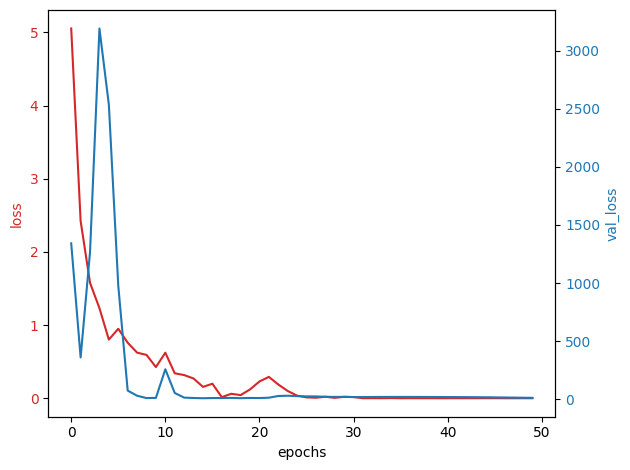

In [15]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color=color)
ax1.plot(history.history['loss'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('val_loss', color=color)  # we already handled the x-label with ax1
ax2.plot(history.history['val_loss'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

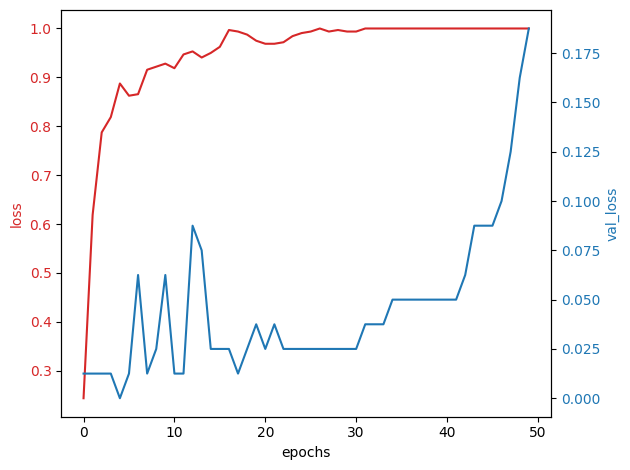

In [16]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color=color)
ax1.plot(history.history['sparse_categorical_accuracy'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('val_loss', color=color)  # we already handled the x-label with ax1
ax2.plot(history.history['val_sparse_categorical_accuracy'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()